In [1]:
from datasets import load_dataset

emotions = load_dataset("emotion")

C:\Users\maste\anaconda3\Lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [2]:
# emotions = emotions.rename_column("label", "int_label")

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
train_ds = emotions["train"]
test_ds = emotions["test"]
validation_ds = emotions["validation"]

train_ds

In [5]:
test_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [6]:
validation_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})

In [7]:
# Converting the Datasets to DataFrames

In [8]:
import pandas as pd
import numpy as np

In [9]:
# Training Data

In [10]:
type(train_ds)

datasets.arrow_dataset.Dataset

In [11]:
train_ds.set_format(type="pandas")
train_ds = train_ds[:]

In [12]:
type(train_ds)

pandas.core.frame.DataFrame

In [13]:

# Testing Data
test_ds.set_format(type="pandas")
test_ds = test_ds[:]

# Validation Data
validation_ds.set_format(type="pandas")
validation_ds = validation_ds[:]

In [14]:
print(type(train_ds))
print(type(test_ds))
print(type(validation_ds))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## Exploratory Data Analysis on the Training Data

In [15]:
train_ds.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [16]:
train_ds.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [17]:
train_ds.columns

Index(['text', 'label'], dtype='object')

#### Vocabulary -> Number of unique words

In [18]:
import re

def extract_unique_words(df, column_name):
    print("Extracting unique words...")
    unique_words = set()  # Using a set to store unique words
    
    # Iterate over each row in the specified column
    for row in df[column_name]:
        # Tokenize the text using regex to extract words
        words = re.findall(r'\b\w+\b', str(row).lower())
        unique_words.update(words)  # Update the set with new words
    
    print("Unique words extraction complete.")
    return unique_words

print("Extracting unique words from dataset...")
vocabulary = extract_unique_words(train_ds, "text")
print("Unique words extraction finished.")

Extracting unique words from dataset...
Extracting unique words...
Unique words extraction complete.
Unique words extraction finished.


In [19]:
sorted(vocabulary)

['a',
 'aa',
 'aaaaaaand',
 'aaaaand',
 'aaaand',
 'aac',
 'aahhh',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abbigail',
 'abc',
 'abdomen',
 'abdominal',
 'abducted',
 'abelard',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abit',
 'able',
 'ableness',
 'abnormally',
 'aboard',
 'abominable',
 'abortion',
 'abou',
 'abound',
 'about',
 'above',
 'abraham',
 'abroad',
 'abruptly',
 'absence',
 'absolute',
 'absolutely',
 'absolutly',
 'absorbed',
 'abstain',
 'abstinence',
 'abstract',
 'absurd',
 'absurdity',
 'abt',
 'abundance',
 'abundantly',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abyss',
 'ac',
 'academia',
 'academic',
 'academics',
 'academy',
 'acause',
 'accelerated',
 'accent',
 'accentuating',
 'accept',
 'acceptable',
 'acceptance',
 'acceptances',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessaries',
 'accessibility',
 'accessories',
 'accessory',
 'accident',
 'accidentally',
 'accidents',


In [20]:
len(vocabulary) ## RAW

15212

In [21]:
 # VOCABULARY AFTER REMOVING THE STOPWORDS
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Ranking Words using Rake (Used to get the most significant Keywords present in a text)

In [22]:
!pip install nltk

### Add label_name

In [23]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [24]:
df = train_ds

In [25]:
df["label_name"] = df["label"].apply(label_int2str)

In [26]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


#### Class Distribution

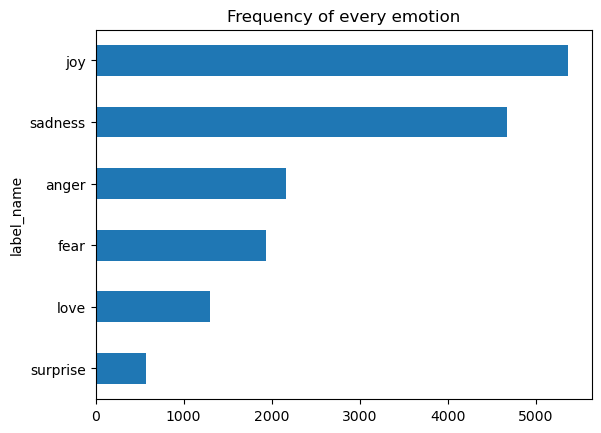

In [27]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending = True).plot.barh()
plt.title("Frequency of every emotion")
plt.show()

##### Words Per Tweet for every Emotion

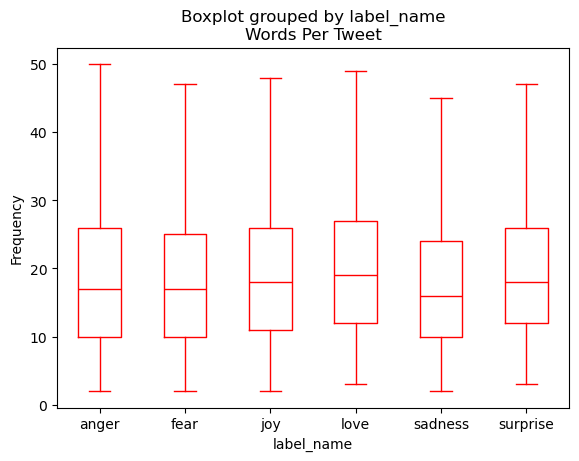

In [28]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet" , by = "label_name" , grid = False, showfliers = False , color = "red")
plt.ylabel("Frequency")
plt.show()

In [29]:
df["Words Per Tweet"]

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64

## Data Preprocessing

### Tokenization: Going with Subword Tokenization. It is a hybrid of character tokenization and word tokenization

- words which are well known by the dictionary will undergo work tokenization
- words which are not well known by the dictionary will be broken down to their corresponding charcters, hence undergoing character tokenization

In [30]:
!pip install transformers

#### Since I will be fine tuning DistilBert Transformer, I will be using its corresponding tokenizer, namely distilbert_tokenizer

In [31]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
distilbert_tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [32]:
distilbert_tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [33]:
distilbert_tokenizer.model_input_names

['input_ids', 'attention_mask']

In [34]:
text = df["text"][5]
print(text)
print()
print()
encoded_text = distilbert_tokenizer(text)
print(encoded_text)

ive been feeling a little burdened lately wasnt sure why that was


{'input_ids': [101, 4921, 2063, 2042, 3110, 1037, 2210, 10859, 2098, 9906, 2347, 2102, 2469, 2339, 2008, 2001, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [35]:
'''
In the context of natural language processing (NLP) and transformers like BERT or DistilBERT, 
the "attention mask" is a sequence of binary values associated with the input tokens. 
It indicates which tokens should be attended to (have attention paid to them) during processing and which ones should be ignored.

Here's what the different values in the attention mask signify:
1: Indicates that the corresponding token in the input sequence should be attended to.
0: Indicates that the corresponding token in the input sequence should be ignored (masked out) and not attended to.
'''

'\nIn the context of natural language processing (NLP) and transformers like BERT or DistilBERT, \nthe "attention mask" is a sequence of binary values associated with the input tokens. \nIt indicates which tokens should be attended to (have attention paid to them) during processing and which ones should be ignored.\n\nHere\'s what the different values in the attention mask signify:\n1: Indicates that the corresponding token in the input sequence should be attended to.\n0: Indicates that the corresponding token in the input sequence should be ignored (masked out) and not attended to.\n'

In [36]:
def tokenize(batch):
    return distilbert_tokenizer(batch["text"] , padding = True , truncation = True)

In [37]:
print(type(emotions))

<class 'datasets.dataset_dict.DatasetDict'>


In [38]:
# import datasets

# emotions = DatasetDict({
#     'train': emotions['train'].rename_column('label', 'label_names'),
#     'validation': emotions['validation'].rename_column('label', 'label_names'),
#     'test': emotions['test'].rename_column('label', 'label_names'),
# })

In [39]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [40]:
print(tokenize)
print(distilbert_tokenizer)

<function tokenize at 0x000001B335F01300>
DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


In [41]:
df

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [42]:
emotions.reset_format()

In [43]:
train_ds_encoded = emotions.map(tokenize , batched = True , batch_size = None)

In [44]:
train_ds_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### Feature Extraction Using Transformers

In [45]:
from transformers import AutoModel
import torch

print("Loading model checkpoint...")
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)
print("Model checkpoint loaded successfully.")

Loading model checkpoint...
Model checkpoint loaded successfully.


#### Extracting the last hidden states

In [46]:
text = "this is a test"
inputs = distilbert_tokenizer(text , return_tensors = "pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [47]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [48]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [49]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [50]:
outputs.last_hidden_state[: , 0].size()

torch.Size([1, 768])

In [51]:
def extract_hidden_states(batch):
    #Place model inputs on the CPU
    inputs = {k : v.to(device) for k,v in batch.items() if k in distilbert_tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state" : last_hidden_state[: , 0].cpu().numpy()}

### Convert input_ids and attention_mask columns to 'torch' format

In [52]:
train_ds_encoded.set_format("torch" , columns = ["input_ids" , "attention_mask" , "label"])

In [53]:
type(train_ds_encoded)

datasets.dataset_dict.DatasetDict

In [54]:
train_ds_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

### Extracting all hidden states 

In [55]:
import torch

print("Available devices:")
print(torch.cuda.device_count())  # Number of available CUDA devices

for i in range(torch.cuda.device_count()):
    name = torch.cuda.get_device_name(i)
    print(f"  Device {i}: {name}")


Available devices:
1
  Device 0: NVIDIA GeForce MX250


In [56]:
emotions_hidden = train_ds_encoded.map(extract_hidden_states , batched = True)

In [57]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [58]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

#### Creating a Feature Matrix

In [59]:
x_train = np.array(emotions_hidden["train"]["hidden_state"])
x_valid = np.array(emotions_hidden["validation"]["hidden_state"])

y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])

In [60]:
x_train[0].shape

(768,)

In [61]:
x_train.shape

(16000, 768)

In [62]:
x_valid[0].shape

(768,)

In [63]:
x_valid.shape

(2000, 768)

In [64]:
print(y_train.shape)
print(y_valid.shape)

(16000,)
(2000,)


In [65]:
!pip install umap
!pip install umap-learn

In [66]:
# Import UMAP package as umap and MinMaxScaler from sklearn.preprocessing
import umap.umap_ as umap
from sklearn.preprocessing import MinMaxScaler

print("Data scaling...")
# Scale features to [0, 1] range using MinMaxScaler
x_scaled = MinMaxScaler().fit_transform(x_train)
print("Data scaling complete.")

print("Initializing and fitting UMAP...")
# Initialize and fit UMAP with 2 components and cosine distance metric
mapper = umap.UMAP(n_components=2, metric="cosine").fit(x_scaled)

print("UMAP fitting complete.")

print("Creating DataFrame of 2D embeddings...")

# Create a DataFrame of 2D embeddings with columns named "X" and "Y"
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])

print("DataFrame creation complete.")

df_emb["label"] = y_train
df_emb.head()

Data scaling...
Data scaling complete.
Initializing and fitting UMAP...
UMAP fitting complete.
Creating DataFrame of 2D embeddings...
DataFrame creation complete.


,X,Y,label
0,4.266179,6.108860,0
1,-3.034185,5.199170,0
2,5.548105,2.736375,3
3,-2.244024,3.386403,2
4,-3.230374,3.343584,3


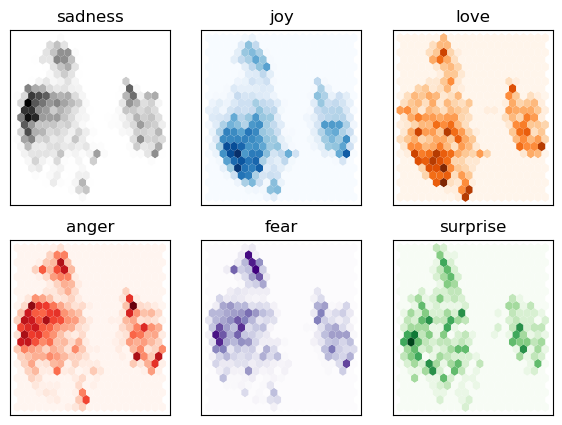

In [67]:
fig, axes = plt.subplots(2 , 3 , figsize = (7,5))
axes = axes.flatten()
cmaps = ["Greys" , "Blues" , "Oranges" , "Reds" , "Purples" , "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels , cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"] , df_emb_sub["Y"] , cmap = cmap , gridsize = 20 , linewidths = (0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]) , axes[i].set_yticks([])

## Model Training

### Training a Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 4000)
lr_clf.fit(x_train , y_train)
lr_clf.score(x_valid , y_valid)

# Training data accuracy
train_accuracy = lr_clf.score(x_train, y_train)

# Test data accuracy
test_accuracy = lr_clf.score(x_valid, y_valid)

print("Training data accuracy:", train_accuracy)
print("Test data accuracy:", test_accuracy)

Training data accuracy: 0.694125
Test data accuracy: 0.632


#### Naive Bayes 

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with k=5 (you can adjust k as needed)
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_clf.fit(x_train, y_train)

# Training data accuracy
train_accuracy = knn_clf.score(x_train, y_train)

# Test data accuracy
test_accuracy = knn_clf.score(x_valid, y_valid)

print("Training data accuracy:", train_accuracy)
print("Test data accuracy:", test_accuracy)

Training data accuracy: 0.62675
Test data accuracy: 0.468


#### Random Forest Classifier: 
###### In scikit-learn, the RandomForestClassifier class can automatically handle multi-class classification without any additional modifications.

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier with 100 trees (you can adjust the number of trees as needed)
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf_clf.fit(x_train, y_train)

# Training data accuracy
train_accuracy = rf_clf.score(x_train, y_train)

# Test data accuracy
test_accuracy = rf_clf.score(x_valid, y_valid)

print("Training data accuracy:", train_accuracy)
print("Test data accuracy:", test_accuracy)

Training data accuracy: 0.998125
Test data accuracy: 0.5205


### Support Vector Machine
###### In scikit-learn, the Support Vector Classifier class can automatically handle multi-class classification without any additional modifications.

In [71]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_clf = SVC()

# Train the classifier on the training data
svm_clf.fit(x_train, y_train)

# Training data accuracy
train_accuracy = svm_clf.score(x_train, y_train)

# Test data accuracy
test_accuracy = svm_clf.score(x_valid, y_valid)

print("Training data accuracy:", train_accuracy)
print("Test data accuracy:", test_accuracy)

Training data accuracy: 0.58475
Test data accuracy: 0.583


### The model which performed the best was logistic regression. Checking its normalized confusion matrix

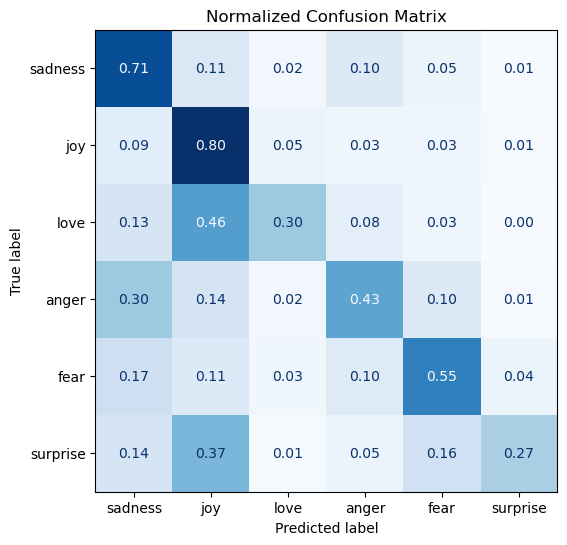

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds , y_true , labels):
    cm = confusion_matrix(y_true , y_preds , normalize = "true")
    fig, ax = plt.subplots(figsize = (6 , 6))
    disp = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = labels)
    disp.plot(cmap = "Blues" , values_format = ".2f" , ax = ax , colorbar = False)

    plt.title("Normalized Confusion Matrix")
    plt.show()

y_preds = lr_clf.predict(x_valid)
plot_confusion_matrix(y_preds , y_valid , labels)

###### Even the best machine learning model is far too much deviating from an ideal confusion matrix (the one where the diagonals have value equal to 1)

### Fine Tuning DistilBERT for our use case

###### Loading the pre-trained model

In [73]:
model_ckpt

'distilbert-base-uncased'

In [74]:
from transformers import AutoModelForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertModel

num_labels = 6
# distilBert_model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt , num_labels = num_labels).to(device))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
distilBert_model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
distilBert_model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [76]:
from sklearn.metrics import accuracy_score, f1_score
import random

def compute_metrics(pred):
    print(type(pred))
    loda = pred.label_ids
    print("acquired labels")
    preds = pred.prediction.argmanx(-1)
    f1 = f1_score(loda , preds , average = "weighted")
    acc = accuracy_score(loda , preds)

    return {"accuracy" : acc, "f1" : f1}

In [77]:
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average='weighted')
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

## Training the Model

In [78]:
!pip install ipywidgets

In [79]:
from huggingface_hub import notebook_login

notebook_login()

In [80]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_hidden["train"]) // batch_size
model_name = f"{model_ckpt}.finetuned-emotion"

In [81]:
!pip install accelerate 
!pip install accelerate -U

In [82]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.40.0', '0.29.3')

In [83]:
!pip install trainer
!pip install transformers[torch]

In [84]:
training_args = TrainingArguments(
    output_dir = model_name,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = "epoch",
    disable_tqdm = False,
    logging_steps = logging_steps,
    push_to_hub = True,
    log_level = "error"
)

In [85]:
train_ds

,text,label,label_name,Words Per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness,24
15996,i am now turning and i feel pathetic that i am...,0,sadness,20
15997,i feel strong and good overall,1,joy,6
15998,i feel like this was such a rude comment and i...,3,anger,14


In [86]:
type(emotions_hidden)

datasets.dataset_dict.DatasetDict

In [87]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [88]:
trainer = Trainer(
    model = distilBert_model , 
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_hidden["train"],
    eval_dataset = emotions_hidden["validation"],
    tokenizer = distilbert_tokenizer
)

In [89]:
import torch

print("Available devices:")
print(torch.cuda.device_count())  # Number of available CUDA devices

for i in range(torch.cuda.device_count()):
    name = torch.cuda.get_device_name(i)
    print(f"  Device {i}: {name}")


Available devices:
1
  Device 0: NVIDIA GeForce MX250


In [90]:
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'gradient_accumulation_kwargs': None},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_steps=None,
evaluation_strategy=IntervalStrategy.EPOCH,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsd

In [91]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss


In [ ]:
print(torch.__version__)
print(transformers.__version__)

In [ ]:
label

In [ ]:
compute_loss